# param_estim_4lump.py

   CHE 5753 – Applied Numerical Computing for Scientists and Engineers
               *Computational Assignment 4: FCC 4 lump model*

 Created by: Haden Kolmer using Dr. Ford Versypt's ODE Param Estim EX2
             Oklahoma State University
             Petroleum Engineering Master's
             haden.kolmer@okstate.edu (please Email for issues or
                                           suggestions)

**Problem:**

 This assignment has two parts: 1.) generate a Python file and
 2.) document using Jupyter creating a .ipynb file. The goal for the
 assignment is to solve a series of ODEs from a given equation sheet and
 given initial conditions to produce the required plots.

**Parameters:**

xaxisData = [0.01667, 0.03333, 0.05, 0.1]  # time, independent variable

yaxisData = [0.5074, 0.3796, 0.2882, 0.1762], [0.3767, 0.4385, 0.4865, 0.5416], [0.0885, 0.136, 0.1681, 0.2108], [0.0274, 0.0459, 0.0572, 0.0714]  # x, dependent variable - VGO, Gasoline, Gas, Coke

**System of ODEs for the 4 lump model**

    dy1dt = -(k12 + k13 + k14) * y1 ** 2
    dy2dt = k12 * y1 ** 2 - k23 * y2 - k24 * y2
    dy3dt = k13 * y1 ** 2 + k23 * y2
    dy4dt = k14 * y1 ** 2 + k24 * y2

[39.04850108 10.01977188  3.12892751  1.31285765  0.65090792]


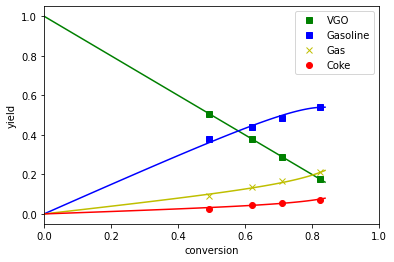

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Data for 4 lump model
xaxisData = np.array([0.01667, 0.03333, 0.05, 0.1])  # time, independent variable
yaxisData = np.array([[0.5074, 0.3796, 0.2882, 0.1762], [0.3767, 0.4385, 0.4865, 0.5416],
                      [0.0885, 0.136, 0.1681, 0.2108],
                      [0.0274, 0.0459, 0.0572, 0.0714]])  # x, dependent variable - VGO, Gasoline, Gas, Coke

# guesses for parameters
k12guess = 1.0
k13guess = 1.0
k14guess = 1.0
k23guess = 1.0
k24guess = 1.0
parameterguesses = np.array([k12guess, k13guess, k14guess, k23guess, k24guess])


# Need two functions for our model
# 1. to define the system of ODE(s)
# 2. to solve the ODE(s) and return ypredicted values in same shape as yaxisData

# 1. define ODEs
def system_of_ODEs(y, t, parameters):  # yvar, xvar, args
    # unpack the parameters
    k12 = parameters[0]
    k13 = parameters[1]
    k14 = parameters[2]
    k23 = parameters[3]
    k24 = parameters[4]
    # unpack the dependent variables
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    y4 = y[3]
    # differential equations for 4 lump model
    dy1dt = -(k12 + k13 + k14) * y1 ** 2
    dy2dt = k12 * y1 ** 2 - k23 * y2 - k24 * y2
    dy3dt = k13 * y1 ** 2 + k23 * y2
    dy4dt = k14 * y1 ** 2 + k24 * y2

    return dy1dt, dy2dt, dy3dt, dy4dt


# end of function

# 2. Solve ODEs at xaxisData points
# and return calculated yaxisCalculated
# using current values of the parameters
def model(xaxisData, *params):
    # initial condition(s) for the ODE(s)
    yaxis0 = np.array([1.0, 0.0, 0.0, 0.0])  # should include a decimal
    # new for > 1 dependent variables:
    numYaxisVariables = 4
    yaxisCalc = np.zeros((xaxisData.size, numYaxisVariables))

    for i in np.arange(0, len(xaxisData)):
        if xaxisData[i] == 0.0:  # should include a decimal
            # edit for > 1 dependent variables:
            yaxisCalc[i, :] = yaxis0
        else:
            xaxisSpan = np.linspace(0.0, xaxisData[i], 101)
            ySoln = odeint(system_of_ODEs, yaxis0, xaxisSpan, args=(params,))  # soln for entire xaxisSpan
            # edit for > 1 dependent variables:
            yaxisCalc[i, :] = ySoln[-1, :]  # calculated y at the end of the xaxisSpan
            # at this point yaxisCalc is now 2D matrix with the number of columns set as : to include all yvariables
            # curve_fit needs a 1D vector that has the rows in a certain order, which result from the next two commands
    yaxisOutput = np.transpose(yaxisCalc)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput
    # end of for loop


# end of model function

# Estimate the parameters
parametersoln, pcov = curve_fit(model, xaxisData, np.ravel(yaxisData), p0=parameterguesses)
print(parametersoln)
# edit for > 1 dependent variables:
xdataConversion = 1 - yaxisData[0, :]

# plotting raw data for VGO, Gasoline, Gas, Coke
plt.plot(xdataConversion, yaxisData[0, :], 'gs')
plt.plot(xdataConversion, yaxisData[1, :], 'bs')
plt.plot(xdataConversion, yaxisData[2, :], 'yx')
plt.plot(xdataConversion, yaxisData[3, :], 'ro')
plt.legend(['VGO', 'Gasoline', 'Gas', 'Coke'])

# initial condition(s) for the ODE(s)
yaxis0 = np.array([1.0, 0.0, 0.0, 0.0])  # should include a decimal
numYaxisVariables = 4
xaxisForPlotting = np.linspace(0, xaxisData[-1], 101)

# plot for yield v conversion
yaxisCalc_OptionB = odeint(system_of_ODEs, yaxis0, xaxisForPlotting, args=(parametersoln,))
Conversion = 1 - yaxisCalc_OptionB[:, 0]  # updating conversion and plotting

# plotting best fit lines
plt.plot(Conversion, yaxisCalc_OptionB[:, 0], 'g-', label='y1 fitted')
plt.plot(Conversion, yaxisCalc_OptionB[:, 1], 'b-', label='y2 fitted')
plt.plot(Conversion, yaxisCalc_OptionB[:, 2], 'y-', label='y3 fitted')
plt.plot(Conversion, yaxisCalc_OptionB[:, 3], 'r-', label='y4 fitted')
plt.xlabel('conversion')
plt.ylabel('yield')
plt.xlim(0, 1)
plt.show()

Yield vs Conversion

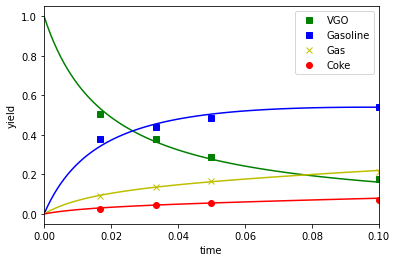

In [2]:
# plotting versus time
plt.plot(xaxisData, yaxisData[0, :], 'gs')
plt.plot(xaxisData, yaxisData[1, :], 'bs')
plt.plot(xaxisData, yaxisData[2, :], 'yx')
plt.plot(xaxisData, yaxisData[3, :], 'ro')
plt.legend(['VGO', 'Gasoline', 'Gas', 'Coke'])

# plotting best fit lines
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 0], 'g-', label='y1 fitted')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 1], 'b-', label='y2 fitted')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 2], 'y-', label='y3 fitted')
plt.plot(xaxisForPlotting, yaxisCalc_OptionB[:, 3], 'r-', label='y4 fitted')
plt.xlabel('time')
plt.ylabel('yield')
plt.xlim(0, 0.1)
plt.show()

Yield vs Time